In [1]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import math

In [2]:
def show_image(image):
    plt.figure(figsize=(10, 10))
    plt.imshow(image, cmap='gray', alpha=1)
    plt.xticks([]), plt.yticks([])
    plt.show()

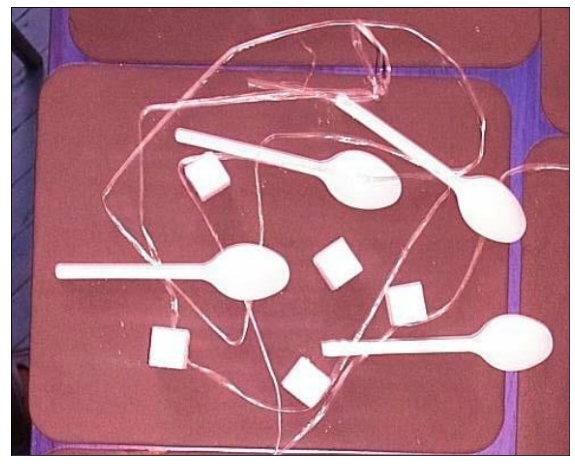

In [3]:
img = cv2.imread('spoons_and_sugar.png')
gray_for_bin = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
show_image(img)

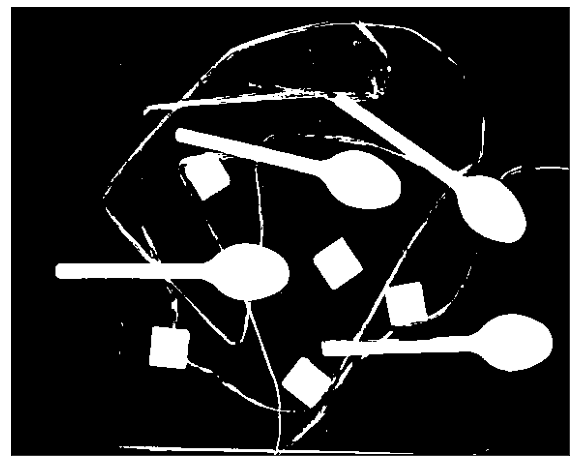

In [4]:
ret, thresh = cv2.threshold(gray_for_bin,0,255,cv2.THRESH_BINARY|cv2.THRESH_OTSU)
show_image(thresh)

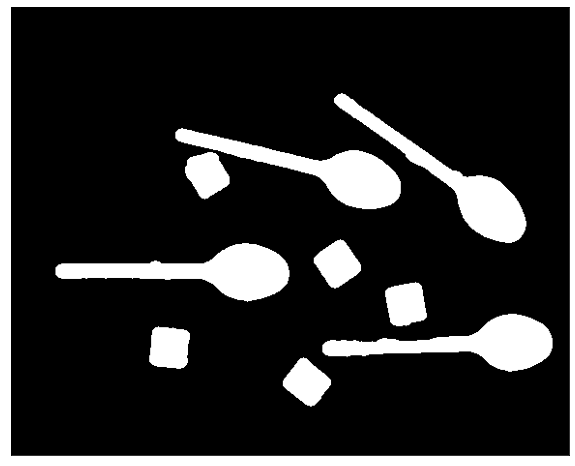

In [5]:
ero = cv2.erode(thresh,cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (13,13)), iterations = 1)
normal_binary = cv2.dilate(ero,cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (13,13)), iterations = 1)
show_image(normal_binary)

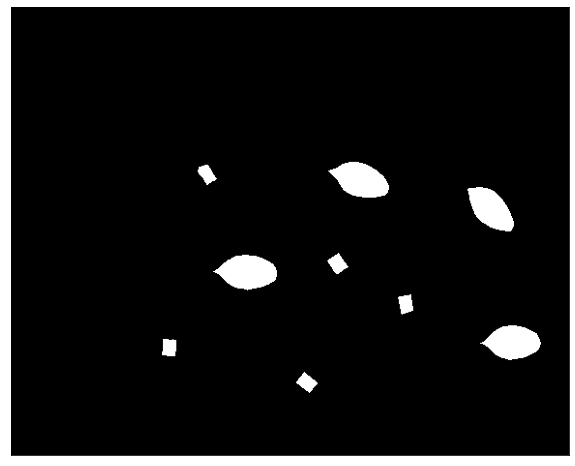

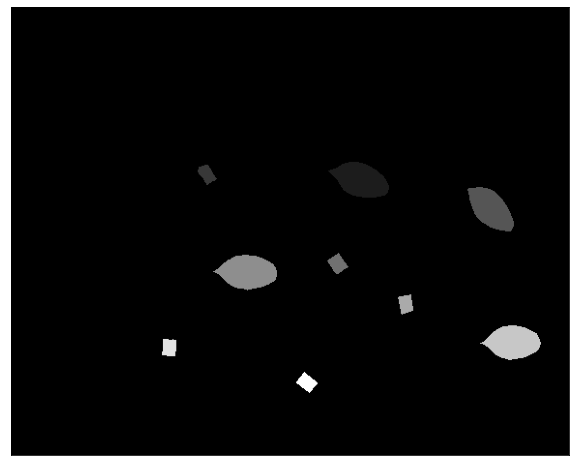

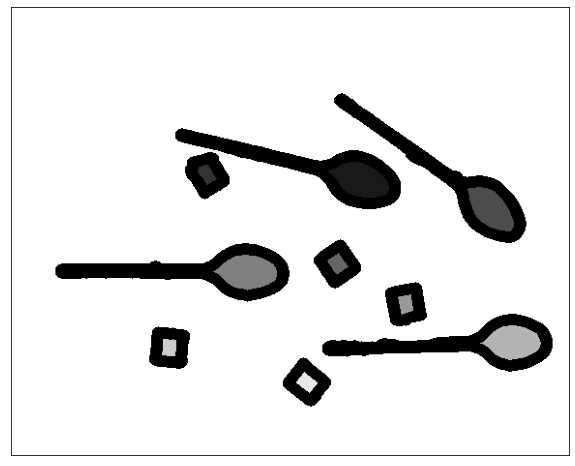

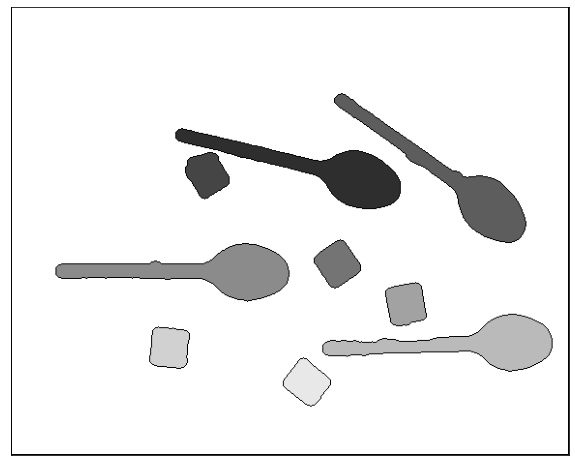

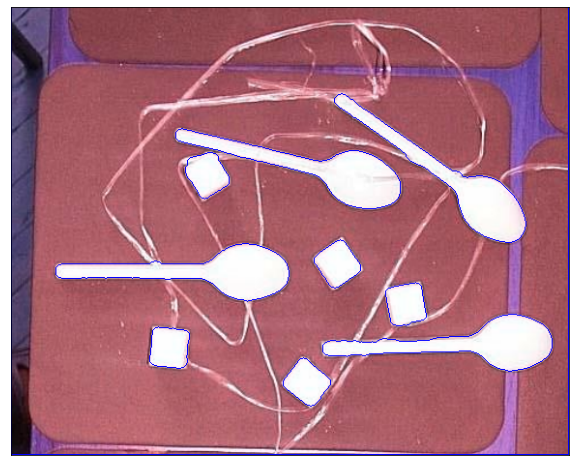

In [6]:
Fixed_normal_binary = np.zeros_like(img)
Fixed_normal_binary[:,:,1] = normal_binary
opening3eroded = cv2.erode(normal_binary, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(13,13)), iterations=2)
show_image(opening3eroded)

everything_count, everything_markers = cv2.connectedComponents(opening3eroded)
show_image(everything_markers)
everything_markers[normal_binary == 0] = 10
show_image(everything_markers)
everything_markers = cv2.watershed(Fixed_normal_binary, everything_markers)
show_image(everything_markers)
img[everything_markers == -1] = (0, 0, 255)
show_image(img)

In [7]:
#------------ Отделение ложек

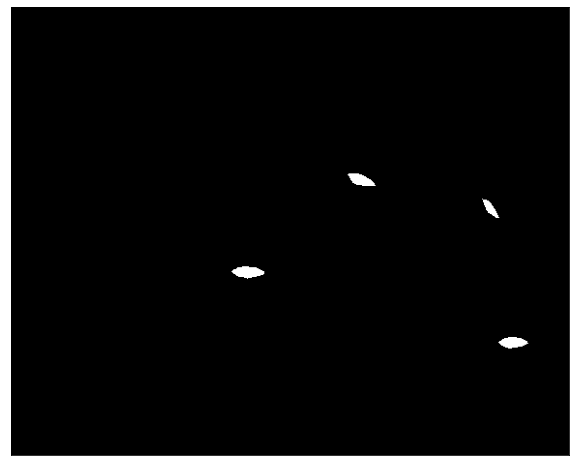

In [8]:
erode_spoons_markers = cv2.erode(normal_binary, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(13,13)), iterations=4)
show_image(erode_spoons_markers)

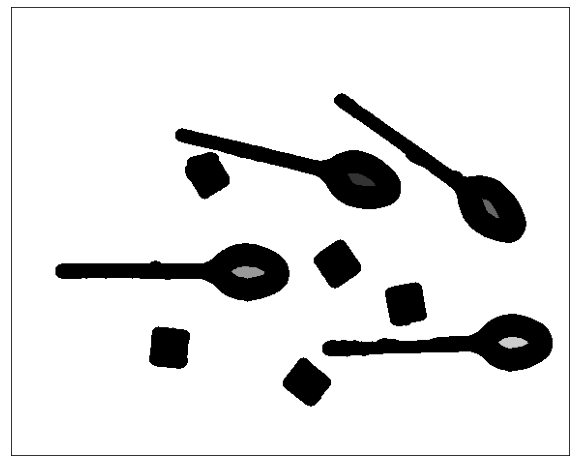

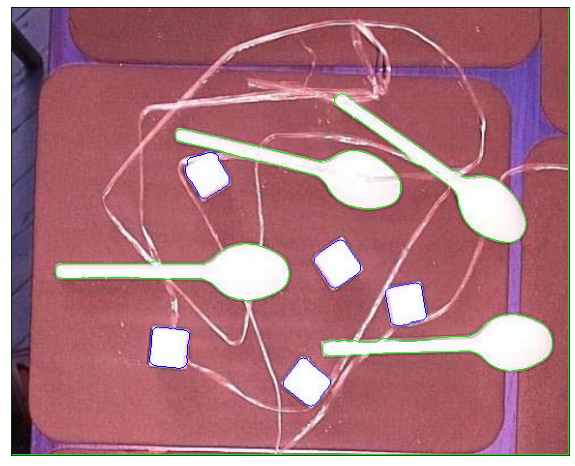

Кубиков сахара:  5
Ложек:  4


In [9]:
spoons_count, spoon_markers = cv2.connectedComponents(erode_spoons_markers)
spoon_markers[normal_binary == 0] = 5
show_image(spoon_markers)
spoon_markers = cv2.watershed(Fixed_normal_binary, spoon_markers)
img[spoon_markers == -1] = (0, 240, 0)
show_image(img)
print("Кубиков сахара: ", everything_count - spoons_count)
print("Ложек: ", spoons_count - 1)